In [56]:
# regression_anomaly_detection.py

# Importing necessary libraries for regression and anomaly detection
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [57]:
import pandas as pd

# Load the preprocessed data
filepath = 'real_estate_data.csv'  # Specify the correct path to your preprocessed data
data = pd.read_csv(filepath)

# Identify numerical and non-numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
non_numerical_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Prepare features (X) and target (y)
X = data[[
    # 'Full Address', 
    'Project Name', 
    # 'Primary Photo', 
    # 'First Two Photos', 
    # 'Floor Plan', 
    'Property Type', 
    'For Sale or For Rent', 
    # 'Asking Price (PHP)',
    # 'Rent Price (PHP)', 
    # 'Price per Sqm (PHP)', 
    # 'Down payment Php', 
    'Down payment %', 
    'Advanced Payment (months)', 
    'Security Deposit (months)', 
    'Minimum Rent duration (months)', 
    'Generic Address', 
    # 'Approximated GPS Pin', 
    'Size (sqm)', 
    'Property Specifications', 
    # 'Property Features', 
    'Property Category', 
    'Created / Updated Date', 
    # 'Full Description', 
    'Developer', 
    'Verified Status', 
    # 'Badges', 
    # 'More Photos', 
    # 'Video Tour', 
    'Related Project', 
    # 'Broker', 
    'Nearness to landmarks/key locations', 
    'Similar Properties', 
    'Commission PHP', 
    'Commission %', 
    'Price vs Zonal Value'
]] 

y = data['Asking Price (PHP)']  # Target variable



In [58]:
# Identify numerical and non-numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
non_numerical_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Label encode the non-numeric features
label_encoder = LabelEncoder()

# Apply label encoding to non-numerical columns
for column in non_numerical_columns:
    if column in X.columns:  # Check if the column exists in the feature set
        X[column] = label_encoder.fit_transform(X[column])


C:\Users\fabia\AppData\Local\Temp\ipykernel_8524\1518733174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\fabia\AppData\Local\Temp\ipykernel_8524\1518733174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\fabia\AppData\Local\Temp\ipykernel_8524\1518733174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 20), (400, 20), (1600,), (400,))

### Linear Regression

In [60]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse


57134530.24294331

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Assuming X and y are already prepared

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test evaluation metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print evaluation metrics for train and test sets
print("Train Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")
print(f"MAPE: {train_mape}")

print("\nTest Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")
print(f"MAPE: {test_mape}")


Train Metrics:
MAE: 4384.899330324074
MSE: 47043688.86242346
RMSE: 6858.84019805269
R²: 0.9999994452455915
MAPE: 0.0002496954984619397

Test Metrics:
MAE: 4944.009696985176
MSE: 57134530.24294331
RMSE: 7558.738667459228
R²: 0.9999993070068549
MAPE: 0.0002827307396616158


In [62]:
# Test case with typical feature values from the dataset
X_test_case1 = X_test.iloc[0:5]  # Select the first 5 rows from the test set
y_test_case1 = y_test.iloc[0:5]

# Predictions
y_pred_case1 = model.predict(X_test_case1)

# Calculate metrics for this test case
mae_case1 = mean_absolute_error(y_test_case1, y_pred_case1)
mse_case1 = mean_squared_error(y_test_case1, y_pred_case1)
rmse_case1 = np.sqrt(mse_case1)
r2_case1 = r2_score(y_test_case1, y_pred_case1)

print("Test Case 1: Typical Case")
print(f"MAE: {mae_case1}")
print(f"MSE: {mse_case1}")
print(f"RMSE: {rmse_case1}")
print(f"R²: {r2_case1}")


Test Case 1: Typical Case
MAE: 1849.7851243130863
MSE: 7732207.3220108645
RMSE: 2780.684685830248
R²: 0.9999999479101878


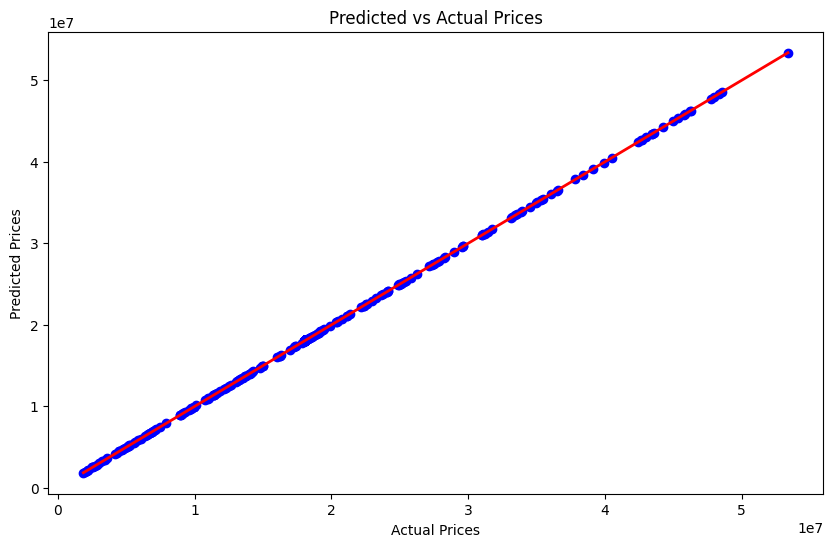

In [63]:
# Visualizing the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [64]:
# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)

# Marking anomalies as -1 and normal points as 1
data['anomaly'] = outliers

# Display rows with anomalies
anomalies = data[data['anomaly'] == -1]
anomalies.head()


,Full Address,Project Name,Primary Photo,First Two Photos,Floor Plan,Property Type,For Sale or For Rent,Asking Price (PHP),Rent Price (PHP),Price per Sqm (PHP),...,More Photos,Video Tour,Related Project,Broker,Nearness to landmarks/key locations,Similar Properties,Commission PHP,Commission %,Price vs Zonal Value,anomaly
29,"2502 Sullivan Union\nHudsonmouth, TN 58275",Avida Towers,what.png,"of.gif,start.tiff",article.csv.pdf,Lot,For Sale,40514454.0,55638.0,195722,...,"population.jpg,goal.jpg",believe.avi,Fame Residences,Lori Smith,16 mins to UP Diliman,Village A,2025722.70,5,Above,-1
37,76255 Jacqueline Turnpike Apt. 216\nEvelynfort...,Lumiere Residences,politics.jpg,"amount.png,economy.gif",meet.ppt.pdf,Lot,For Sale,51258576.0,55638.0,181768,...,"look.bmp,what.jpeg",gas.avi,Avida Towers,Douglas Sanchez,9 mins to Megamall,Residences B,2562928.80,5,Above,-1
66,"0140 David Course\nWest Williambury, CO 70171",The Grove by Rockwell,provide.gif,"religious.gif,city.jpeg",body.jpeg.pdf,Condominium,For Rent,18093091.0,71899.0,123851,...,"fly.jpeg,while.jpeg",drug.mp4,Sonora Garden Residences,Belinda Walters,11 mins to IT Park,Residences B,1437.98,2,Below,-1
97,"3955 Miller Station\nTorresshire, WI 78670",Air Residences,including.tiff,"recently.png,tax.gif",civil.flac.pdf,House,For Rent,18093091.0,75339.0,61278,...,"catch.gif,as.tiff",early.webm,Air Residences,Christina Clarke,10 mins to UP Diliman,Village A,1506.78,2,Below,-1
130,"PSC 2448, Box 9434\nAPO AP 22691",Sonora Garden Residences,material.jpg,"plant.png,now.jpeg",central.html.pdf,House,For Rent,18093091.0,18976.0,149269,...,"hour.gif,direction.tiff",watch.avi,Air Residences,Ashley Herrera,6 mins to Greenbelt,Tower 1,379.52,2,Below,-1


In [65]:
# # Visualizing anomalies in the price vs square footage scatter plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=data['square_footage'], y=data['price'], hue=data['anomaly'], palette='coolwarm', legend=False)
# plt.title('Price vs Square Footage with Anomalies')
# plt.xlabel('Square Footage')
# plt.ylabel('Price')
# plt.show()
